In [1]:
import numpy as np
import pandas as pd
from scipy import stats

In [2]:
a = pd.date_range(start='12/01/2022', end='05/10/2023') #мне нужен ряд из дат, потому что я не каждыйй день подавал.

In [3]:
A_ = pd.DataFrame(a, dtype = 'datetime64[ns]', columns = ['Date']) #сформировал из них датафрейм

In [4]:
df = pd.read_csv('job_s.csv') #загрузил данные в формате CSV
df.head()

,date,position,Junior,link,company,source,source_title,region,ifremoute,summary,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18
0,12/5/2022,Data Analyst,0,NaN,scandiweb,2,hh,Georgia,remote,no feedback,Source,1.0,LinkedIn,Ifremote,1.0,remote,Summary,0.0,No feedback
1,12/5/2022,Data Analyst,0,NaN,BettingJobs.com,1,LinkedIn,Malta,hybrid,no feedback,NaN,2.0,hh,NaN,2.0,hybrid,NaN,1.0,Reject
2,12/5/2022,Game Analyst,0,NaN,PokerStars,1,LinkedIn,UK,hybrid,reject,NaN,3.0,habrcareer,NaN,3.0,office,NaN,2.0,Interwiev
3,12/5/2022,Game Analyst,0,NaN,PokerStars,1,LinkedIn,UK,hybrid,reject,NaN,4.0,TG,NaN,NaN,NaN,NaN,NaN,NaN
4,12/5/2022,Game Analyst,0,NaN,Betclic Group,1,LinkedIn,Malta,hybrid,reject,NaN,5.0,Superjob,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.date=df['date'].astype('datetime64[ns]')#приведение к типу данных

In [6]:
df_j = pd.merge(A_,df, how = 'outer', left_on='Date', right_on='date', left_index=False, right_index=False )
#соединение таблиц, теперь у нас полная хронология

In [7]:
df_j

,Date,date,position,Junior,link,company,source,source_title,region,ifremoute,summary,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18
0,2022-12-01,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2022-12-02,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2022-12-03,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2022-12-04,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2022-12-05,2022-12-05,Data Analyst,0.0,NaN,scandiweb,2.0,hh,Georgia,remote,no feedback,Source,1.0,LinkedIn,Ifremote,1.0,remote,Summary,0.0,No feedback
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,2023-05-06,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
280,2023-05-07,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
281,2023-05-08,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
282,2023-05-09,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df_j = df_j[['Date','position','Junior','link','source_title','region','ifremoute','summary']]
#оставляем только нужные колонки

In [9]:
df_j

,Date,position,Junior,link,source_title,region,ifremoute,summary
0,2022-12-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2022-12-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2022-12-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2022-12-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2022-12-05,Data Analyst,0.0,NaN,hh,Georgia,remote,no feedback
...,...,...,...,...,...,...,...,...
279,2023-05-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN
280,2023-05-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN
281,2023-05-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN
282,2023-05-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [60]:
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
rcParams['figure.figsize'] = 7,6

In [37]:
round((df_j.region.value_counts()/df_j.position.count()*100),1)#доля откликов по странам

Russia         44.4
Malta          16.0
Georgia        10.2
UK              5.3
Latvia          4.8
USA             3.7
Canada          2.1
Poland          1.6
Spain           1.6
Greece          1.1
Hungary         1.1
Kazahstan       1.1
Armenia         1.1
Belarus         0.5
Bulgaria        0.5
Ireland         0.5
South Korea     0.5
Lithuania       0.5
Australia       0.5
France          0.5
Seychellas      0.5
Finnland        0.5
Romania         0.5
Ukraine         0.5
Name: region, dtype: float64

In [38]:
round((df_j.region.value_counts()/df_j.position.count()*100).head(6).sum(),1)#видно, что на топ-6 стран приходится 84,5% откликов

84.5

In [50]:
df_j.region.count()/len(df_j.region.unique())#cреднее количество откликов на страну = 7.5

7.48

In [39]:
round((df_j.position.value_counts()/df_j.position.count())*100,1)#пропорции откликов по профессиям

Data Analyst           47.1
Analyst                12.3
Game Analyst            8.6
BI Analyst              5.9
Product Analyst         4.8
CCTV                    4.8
Fraud Analyst           3.7
other                   3.2
Data Scientist          2.1
SQL Delevoper           1.6
Marketing Analyst       1.1
Business Analyst        1.1
Web Analyst             1.1
Risk Analyst            1.1
Junior Web Analyst      0.5
Junior Data Analyst     0.5
Casino Analyst          0.5
Name: position, dtype: float64

In [56]:
round(((df_j.position.value_counts()/df_j.position.count())*100).head(6).sum(),1)# 83,4% откликов приходится на топ-6 профессий

83.4

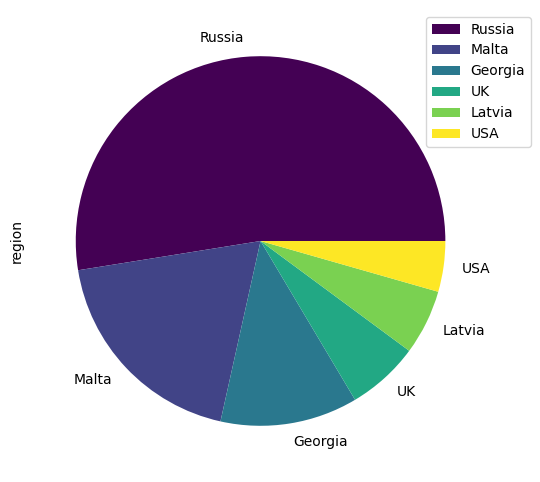

In [61]:
top_countries = df_j['region'].value_counts().head(6)
top_countries.plot(kind='pie', cmap = 'viridis')
plt.legend(bbox_to_anchor=(0.6, .5, 0.5, 0.5))
#plt.savefig('02.jpeg')

In [58]:
round(df_j.position.count()/len(df_j.position.unique()),1) #среднее количество откликов на профессию

10.4

In [68]:
df_join = pd.get_dummies(df_j, columns = ['ifremoute','summary'])
#переводим признаки в формат даммиз

In [69]:
df_join.columns

Index(['Date', 'position', 'Junior', 'link', 'source_title', 'region',
       'ifremoute_hybrid', 'ifremoute_no info', 'ifremoute_office',
       'ifremoute_remote', 'summary_interview', 'summary_no feedback',
       'summary_reject'],
      dtype='object')

In [70]:
X = df_join.groupby('Date').agg({'position':'count','summary_interview':'sum','summary_no feedback':'sum','summary_reject':'sum'}).sort_values('Date')

In [ ]:
df_grouped = df_join.groupby(['position','region']).agg({'summary_interview':'sum','summary_no feedback':'sum','summary_reject':'sum'})

In [ ]:
df_grouped

summary_interview  summary_no feedback  \
position      region                                                
Analyst       Canada                       0                    1   
              Georgia                      0                    0   
              Malta                        0                    1   
              Russia                       4                    6   
              South Korea                  0                    1   
...                                      ...                  ...   
SQL Delevoper Spain                        0                    1   
Web Analyst   Kazahstan                    0                    0   
              Russia                       0                    1   
other         Bulgaria                     0                    1   
              Russia                       0                    2   

                           summary_reject  
position      region                       
Analyst       Canada                    0  
              Georgia                   0  
              Malta                     2  
              Russia                    5  
              South Korea               0  
...                                   ...  
SQL Delevoper Spain                     0  
Web Analyst   Kazahstan                 1  
              Russia                    0  
other         Bulgaria                  0  
              Russia                    1  

[61 rows x 3 columns]

In [84]:
top_countries = df_join['region'].value_counts().sort_values(ascending=False).head(6).index.values#формирует массив из стран

In [87]:
df_top_c = df_j[df_j.region.isin(top_countries)]

In [91]:
df_before = df_j[df_j.Date < '2023-03-15']

In [93]:
df_after = df_j[df_j.Date >= '2023-03-15']

In [92]:
df_before

,Date,position,Junior,link,source_title,region,ifremoute,summary
0,2022-12-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2022-12-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2022-12-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2022-12-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2022-12-05,Data Analyst,0.0,NaN,hh,Georgia,remote,no feedback
...,...,...,...,...,...,...,...,...
149,2023-03-14,Product Analyst,0.0,NaN,hh,Georgia,remote,reject
150,2023-03-14,Data Analyst,0.0,NaN,hh,Georgia,hybrid,reject
151,2023-03-14,BI Analyst,0.0,NaN,hh,Georgia,remote,no feedback
152,2023-03-14,Data Analyst,1.0,NaN,Glassdoor,USA,remote,no feedback


In [89]:
df_top_c

,Date,position,Junior,link,source_title,region,ifremoute,summary
4,2022-12-05,Data Analyst,0.0,NaN,hh,Georgia,remote,no feedback
5,2022-12-05,Data Analyst,0.0,NaN,LinkedIn,Malta,hybrid,no feedback
6,2022-12-05,Game Analyst,0.0,NaN,LinkedIn,UK,hybrid,reject
7,2022-12-05,Game Analyst,0.0,NaN,LinkedIn,UK,hybrid,reject
8,2022-12-05,Game Analyst,0.0,NaN,LinkedIn,Malta,hybrid,reject
...,...,...,...,...,...,...,...,...
271,2023-05-02,Analyst,0.0,NaN,TG,Russia,remote,NaN
272,2023-05-02,BI Analyst,1.0,https://hh.ru/vacancy/79519316,hh,Russia,remote,NaN
273,2023-05-02,Analyst,0.0,https://hh.ru/vacancy/79454053,hh,Georgia,remote,NaN
274,2023-05-02,Data Analyst,0.0,https://strivegaming.bamboohr.com/jobs/view.ph...,LinkedIn,Malta,hybrid,NaN


In [ ]:
sns.violinplot(data=df_top_c, x="region", y="position", hue="Junior",
               split=True, inner="quart", linewidth=1,
               palette={"Yes": "b", "No": ".85"})
sns.despine(left=True)

In [73]:
top_professions = df_join['position'].value_counts().sort_values(ascending = False).head(6)

In [ ]:
df[df['Platform'].isin(top_platforms)].pivot_table(
                        index='Platform', 
                        columns='Genre', 
                        values='Global_Sales', 
                        aggfunc=sum).fillna(0)

position
region


In [74]:
X[['position','summary_interview','summary_no feedback','summary_reject']] = X[['position','summary_interview','summary_no feedback','summary_reject']].cumsum()

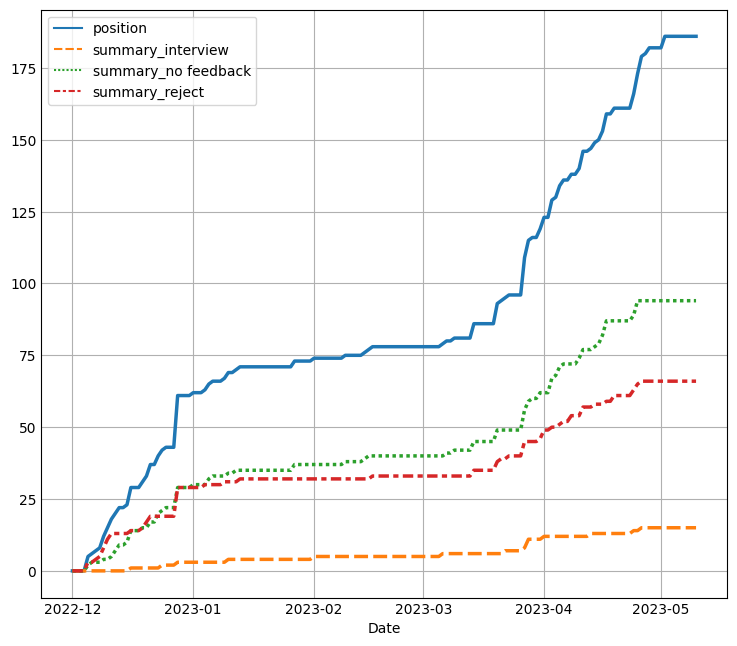

In [ ]:
sns.lineplot(data=X, palette="tab10", linewidth=2.5)
plt.savefig('03.jpeg')

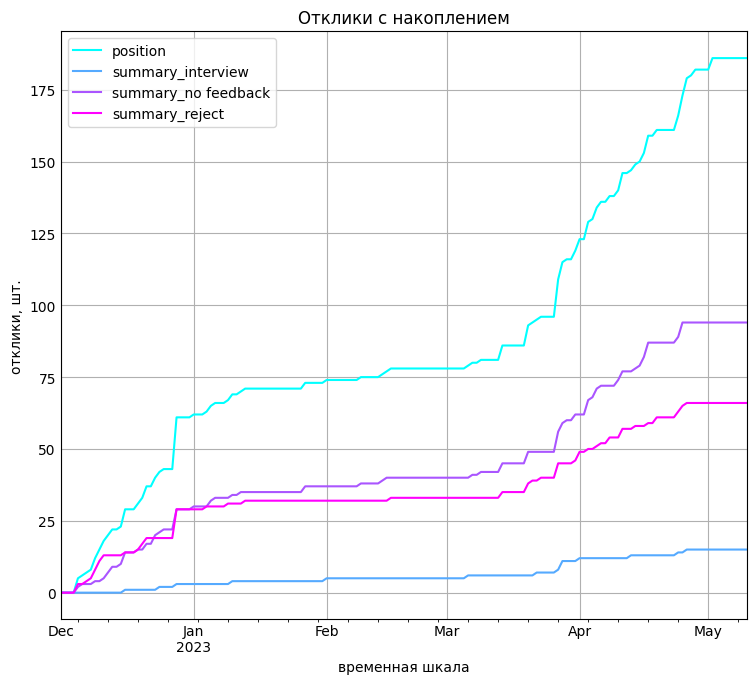

In [ ]:
X.plot(title='Отклики с накоплением', 
                             xlabel='временная шкала', 
                             ylabel='отклики, шт.', cmap = 'cool')
#plt.text(2023, 100, 'Заказал резюме в агенстве')  

plt.legend(loc='upper left')

In [117]:
#группировка по странам до 15 марта
df_countr_b = df_join[df_join.Date < '2023-03-15'].groupby('region').agg({'position':'count','Junior':'sum','summary_interview':'sum','summary_no feedback':'sum','summary_reject':'sum'}).sort_values('position', ascending = False)

In [118]:
#по странам после 15 марта
df_countr_a = df_join[df_join.Date >= '2023-03-15'].groupby('region').agg({'position':'count','Junior':'sum','summary_interview':'sum','summary_no feedback':'sum','summary_reject':'sum'}).sort_values('position', ascending = False)

In [157]:
#по профессиям до 15 марта
df_proff_b = df_join[df_join.Date < '2023-03-15'].groupby('position').agg({'region':'count','Junior':'sum','summary_interview':'sum','summary_no feedback':'sum','summary_reject':'sum'}).sort_values('position', ascending = False)

In [158]:
#по профессиям после 15 марта
df_proff_a = df_join[df_join.Date >= '2023-03-15'].groupby('position').agg({'region':'count','Junior':'sum','summary_interview':'sum','summary_no feedback':'sum','summary_reject':'sum'}).sort_values('position', ascending = False)

In [159]:
#по источникам до 15 марта
df_source_b = df_join[df_join.Date < '2023-03-15'].groupby('source_title').agg({'region':'count','position':'count','Junior':'sum','summary_interview':'sum','summary_no feedback':'sum','summary_reject':'sum'}).sort_values('position', ascending = False)

In [160]:
#по источникам после 15 марта
df_source_a = df_join[df_join.Date >= '2023-03-15'].groupby('source_title').agg({'region':'count','position':'count','Junior':'sum','summary_interview':'sum','summary_no feedback':'sum','summary_reject':'sum'}).sort_values('position', ascending = False)

In [216]:
df_countr_a['reject_rate'] = round(df_countr_a['summary_reject']/df_countr_a.position.sum()*100,1)

In [227]:
df_countr_b['reject_rate'] = round(df_countr_b['summary_reject']/df_countr_b.position.sum()*100,1)

In [218]:
df_countr_a['interview_rate'] = round(df_countr_a['summary_interview']/df_countr_a.position.sum()*100,1)

In [228]:
df_countr_b['interview_rate'] = round(df_countr_b['summary_interview']/df_countr_b.position.sum()*100,1)

In [220]:
df_countr_a['nofeedback_rate'] = round(df_countr_a['summary_no feedback']/df_countr_a.position.sum()*100,1)

In [229]:
df_countr_b['nofeedback_rate'] = round(df_countr_b['summary_no feedback']/df_countr_b.position.sum()*100,1)

In [232]:
df_proff_a['reject_rate'] = round(df_proff_a['summary_reject']/df_proff_a.region.sum()*100,1)

In [234]:
df_proff_a['nofeedback_rate'] = round(df_proff_a['summary_no feedback']/df_proff_a.region.sum()*100,1)

In [235]:
df_proff_a['interview_rate'] = round(df_proff_a['summary_interview']/df_proff_a.region.sum()*100,1)

In [236]:
df_proff_b['reject_rate'] = round(df_proff_b['summary_reject']/df_proff_b.region.sum()*100,1)

In [238]:
df_proff_b['nofeedback_rate'] = round(df_proff_b['summary_no feedback']/df_proff_b.region.sum()*100,1)

In [239]:
df_proff_b['interview_rate'] = round(df_proff_b['summary_interview']/df_proff_b.region.sum()*100,1)

In [243]:
df_source_b['interview_rate'] = round(df_source_b['summary_interview']/df_source_b.position.sum()*100,1)

In [244]:
df_source_a['interview_rate'] = round(df_source_a['summary_interview']/df_source_a.position.sum()*100,1)

In [246]:
df_source_b['reject_rate'] = round(df_source_b['summary_reject']/df_source_b.position.sum()*100,1)

In [247]:
df_source_a['reject_rate'] = round(df_source_a['summary_reject']/df_source_a.position.sum()*100,1)

In [249]:
df_source_b['nofeedback_rate'] = round(df_source_b['summary_no feedback']/df_source_b.position.sum()*100,1)

In [250]:
df_source_a['nofeedback_rate'] = round(df_source_a['summary_no feedback']/df_source_a.position.sum()*100,1)

In [126]:
df_rate_c_a = df_countr_a[['reject_rate','interview_rate','nofeedback_rate']]
#датафрейм с группировкой по странам до 15 марта с конверсией 

In [230]:
df_c_compare = pd.merge(df_countr_b,df_countr_a, how = 'outer', left_on='region', right_on='region', left_index=False, right_index=False )

In [240]:
df_p_compare = pd.merge(df_proff_b,df_proff_a, how = 'outer', left_on='position', right_on='position', left_index=False, right_index=False )

In [251]:
df_s_compare = pd.merge(df_source_b,df_source_a, how = 'outer', left_on='source_title', right_on='source_title', left_index=False, right_index=False )

In [310]:
df_p_compare[['region_x','region_y','Junior_x','Junior_y','interview_rate_x','interview_rate_y','nofeedback_rate_x','nofeedback_rate_y']].\
sort_values('region_x', ascending = False).head(8).style.bar(align='mid', cmap='summer')
#топ-6 профессий по откликам


,region_x,region_y,Junior_x,Junior_y,interview_rate_x,interview_rate_y,nofeedback_rate_x,nofeedback_rate_y
position,,,,,,,,
Data Analyst,33.000000,55.000000,15.000000,13.000000,0.000000,5.000000,24.400000,29.700000
Game Analyst,13.000000,3.000000,0.000000,0.000000,2.300000,0.000000,4.700000,2.000000
Analyst,10.000000,13.000000,2.000000,3.000000,2.300000,1.000000,3.500000,6.900000
CCTV,7.000000,2.000000,0.000000,0.000000,0.000000,0.000000,7.000000,2.000000
Product Analyst,6.000000,3.000000,2.000000,0.000000,0.000000,0.000000,3.500000,2.000000
Fraud Analyst,4.000000,3.000000,0.000000,0.000000,0.000000,0.000000,2.300000,1.000000
BI Analyst,3.000000,8.000000,0.000000,4.000000,0.000000,0.000000,2.300000,4.000000
other,2.000000,4.000000,1.000000,0.000000,0.000000,1.000000,1.200000,2.000000


In [252]:
df_s_compare[['position_x','position_y','Junior_x','Junior_y','interview_rate_x','interview_rate_y','nofeedback_rate_x','nofeedback_rate_y']].\
sort_values('position_y', ascending = False).head().style.bar(align='mid', cmap='autumn')
#топ-6 источников по откликам


,position_x,position_y,Junior_x,Junior_y,interview_rate_x,interview_rate_y,nofeedback_rate_x,nofeedback_rate_y
source_title,,,,,,,,
LinkedIn,25.000000,38.000000,7.000000,9.000000,1.200000,2.000000,15.100000,19.800000
hh,36.000000,23.000000,10.000000,5.000000,2.300000,2.000000,17.400000,12.900000
TG,8.000000,13.000000,7.000000,1.000000,2.300000,2.000000,4.700000,5.900000
Glassdoor,1.000000,9.000000,1.000000,2.000000,0.000000,0.000000,1.200000,4.000000
Geekjobs,1.000000,5.000000,1.000000,2.000000,0.000000,1.000000,1.200000,4.000000


In [231]:
df_c_compare[['position_x','position_y','Junior_x','Junior_y','interview_rate_x','interview_rate_y','nofeedback_rate_x','nofeedback_rate_y']].\
sort_values('position_y', ascending = False).head(6).style.bar(cmap='cool')

#топ-6 стран по откликам на вакансии


,position_x,position_y,Junior_x,Junior_y,interview_rate_x,interview_rate_y,nofeedback_rate_x,nofeedback_rate_y
region,,,,,,,,
Russia,40.000000,43.000000,16.000000,11.000000,4.700000,5.000000,19.800000,23.800000
Malta,17.000000,13.000000,1.000000,2.000000,2.300000,1.000000,9.300000,5.900000
Georgia,9.000000,10.000000,1.000000,4.000000,0.000000,2.000000,7.000000,4.000000
UK,2.000000,8.000000,0.000000,1.000000,0.000000,0.000000,0.000000,4.000000
Latvia,2.000000,7.000000,1.000000,2.000000,0.000000,0.000000,2.300000,5.000000
USA,2.000000,5.000000,1.000000,1.000000,0.000000,0.000000,2.300000,3.000000


In [253]:
from scipy import stats 

In [258]:
stat, p = stats.shapiro(df_source_a.dropna().nofeedback_rate)

print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Вероятно нормальное распределение')
else:
    print('Вероятно не нормальное распределение')
     

stat=0.759, p=0.007
Вероятно не нормальное распределение


In [259]:
stat, p = stats.shapiro(df_source_b.dropna().nofeedback_rate)

print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Вероятно нормальное распределение')
else:
    print('Вероятно не нормальное распределение')
     

stat=0.810, p=0.026
Вероятно не нормальное распределение


In [263]:
#тест Мана-Уитни для небольших выборок с ненормальным распределением говорит, что выборки не отличаются.
stat, p = stats.mannwhitneyu(df_source_b.nofeedback_rate,df_source_a.nofeedback_rate)

print(f"Статистика = {stat:.5f}, p = {p:.10f}")

if p > 0.05:
    print('Не отклоняем нулевую гипотезу, распределения, вероятно, одинаковые')
else:
    print('Отклоняем нулевую гипотезу, распределения, вероятно, различаются')
     

Статистика = 36.00000, p = 0.7226941528
Не отклоняем нулевую гипотезу, распределения, вероятно, одинаковые


Статистика = -0.20, p = 0.8433033982
Не отклоняем нулевую гипотезу, средние, вероятно, одинаковые


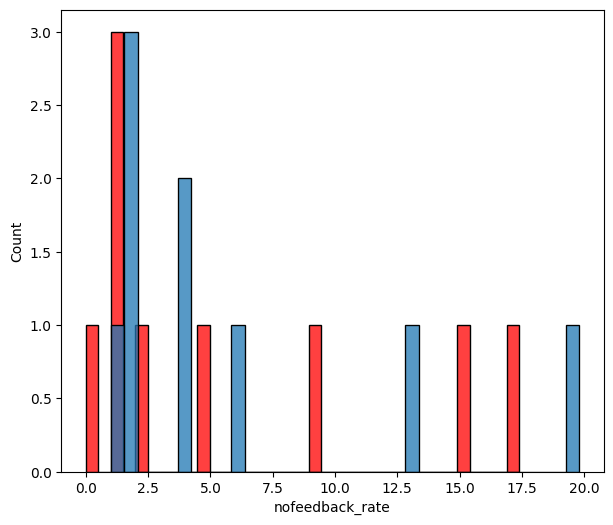

In [266]:
# т-тест здесь не применим, но если бы решили провести парный т-тест для связанных выборок, то он показал бы, что выборки не отличаются
stat, p_v = stats.ttest_rel(df_source_b.nofeedback_rate,df_source_a.nofeedback_rate)

print(f"Статистика = {stat:.2f}, p = {p_v:.10f}")

if p > 0.05:
    print('Не отклоняем нулевую гипотезу, средние, вероятно, одинаковые')
else:
    print('Отклоняем нулевую гипотезу, средние, вероятно, различаются')

sns.histplot(df_source_b.nofeedback_rate, bins = 35, color = 'red');
sns.histplot(df_source_a.nofeedback_rate, bins = 35);

In [268]:
stat, p = stats.shapiro(df_source_a.reject_rate)

print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Вероятно нормальное распределение')
else:
    print('Вероятно не нормальное распределение')

stat=0.776, p=0.011
Вероятно не нормальное распределение


In [270]:
stat, p = stats.shapiro(df_source_b.reject_rate)

print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Вероятно нормальное распределение')
else:
    print('Вероятно не нормальное распределение')

stat=0.651, p=0.000
Вероятно не нормальное распределение


Статистика = 36.00000, p = 0.7226941528
Не отклоняем нулевую гипотезу, распределения, вероятно, одинаковые


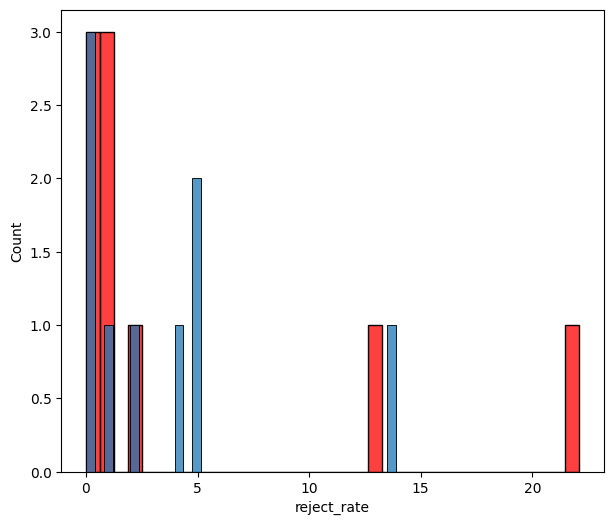

In [272]:
stat, p = stats.mannwhitneyu(df_source_b.nofeedback_rate,df_source_a.nofeedback_rate)

print(f"Статистика = {stat:.5f}, p = {p:.10f}")

if p > 0.05:
    print('Не отклоняем нулевую гипотезу, распределения, вероятно, одинаковые')
else:
    print('Отклоняем нулевую гипотезу, средние, вероятно, различаются')

sns.histplot(df_source_b.reject_rate, bins = 35, color = 'red');
sns.histplot(df_source_a.reject_rate, bins = 35);

Статистика = 114.00000, p = 0.7080032883
Не отклоняем нулевую гипотезу, распределения, вероятно, одинаковые


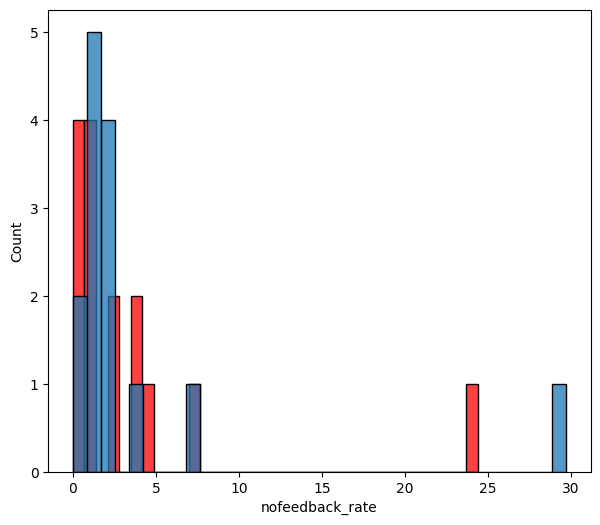

In [275]:
stat, p = stats.mannwhitneyu(df_proff_b.nofeedback_rate,df_proff_a.nofeedback_rate)

print(f"Статистика = {stat:.5f}, p = {p:.10f}")

if p > 0.05:
    print('Не отклоняем нулевую гипотезу, распределения, вероятно, одинаковые')
else:
    print('Отклоняем нулевую гипотезу, средние, вероятно, различаются')

sns.histplot(df_proff_b.nofeedback_rate, bins = 35, color = 'red');
sns.histplot(df_proff_a.nofeedback_rate, bins = 35);

Статистика = 132.00000, p = 0.2382847682
Не отклоняем нулевую гипотезу, распределения, вероятно, одинаковые


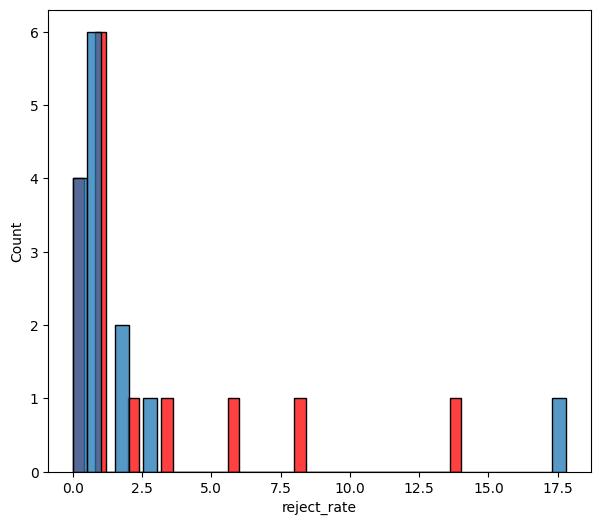

In [276]:
stat, p = stats.mannwhitneyu(df_proff_b.reject_rate,df_proff_a.reject_rate)

print(f"Статистика = {stat:.5f}, p = {p:.10f}")

if p > 0.05:
    print('Не отклоняем нулевую гипотезу, распределения, вероятно, одинаковые')
else:
    print('Отклоняем нулевую гипотезу, средние, вероятно, различаются')

sns.histplot(df_proff_b.reject_rate, bins = 35, color = 'red');
sns.histplot(df_proff_a.reject_rate, bins = 35);

Статистика = 19.00000, p = 0.7343750000
Не отклоняем нулевую гипотезу, распределения, вероятно, одинаковые


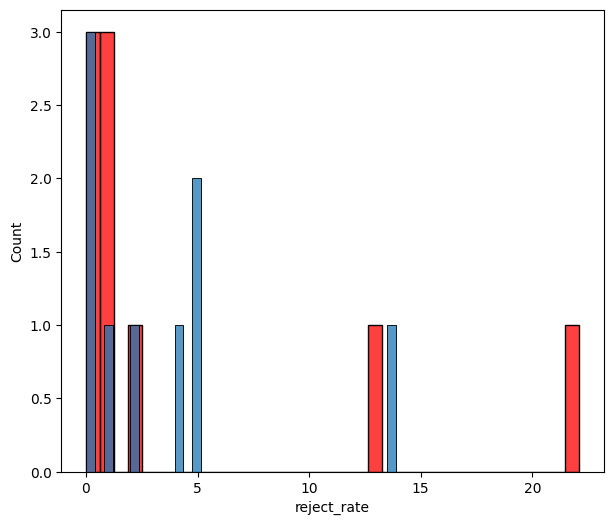

In [278]:
#Манна_Уитни критикуют, часто неоравданно часто отклоняет Но.
#Применил непараметрический тест Вилкоксона для связанных выборок.
#Резкльтат - выборки не отличаются!
stat, p = stats.wilcoxon(df_source_b.nofeedback_rate,df_source_a.nofeedback_rate)

print(f"Статистика = {stat:.5f}, p = {p:.10f}")

if p > 0.05:
    print('Не отклоняем нулевую гипотезу, распределения, вероятно, одинаковые')
else:
    print('Отклоняем нулевую гипотезу, средние, вероятно, различаются')

sns.histplot(df_source_b.reject_rate, bins = 35, color = 'red');
sns.histplot(df_source_a.reject_rate, bins = 35);

In [ ]:
df_countr_a.info()#19

In [ ]:
df_countr_b.info()#15

In [281]:
#сэмплируем а
sample_a = df_countr_a.sample(15)

In [283]:
stat, p = stats.mannwhitneyu(df_countr_b.nofeedback_rate,sample_a.nofeedback_rate)

print(f"Статистика = {stat:.5f}, p = {p:.10f}")

if p > 0.05:
    print('Не отклоняем нулевую гипотезу, распределения, вероятно, одинаковые')
else:
    print('Отклоняем нулевую гипотезу, средние, вероятно, различаются')

Статистика = 141.00000, p = 0.2372283199
Не отклоняем нулевую гипотезу, распределения, вероятно, одинаковые


Статистика = 32.00000, p = 0.1205444336
Не отклоняем нулевую гипотезу, распределения, вероятно, одинаковые


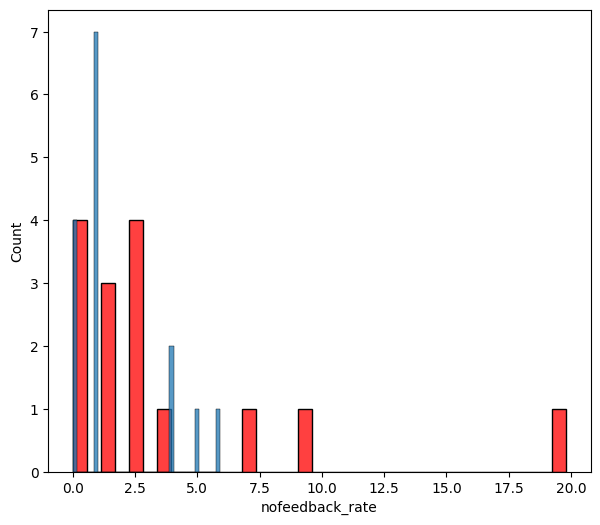

In [282]:
#Применил непараметрический тест Вилкоксона для связанных выборок.
#
#Резкльтат - выборки не отличаются!
stat, p = stats.wilcoxon(df_countr_b.nofeedback_rate,sample_a.nofeedback_rate)

print(f"Статистика = {stat:.5f}, p = {p:.10f}")

if p > 0.05:
    print('Не отклоняем нулевую гипотезу, распределения, вероятно, одинаковые')
else:
    print('Отклоняем нулевую гипотезу, средние, вероятно, различаются')

sns.histplot(df_countr_b.nofeedback_rate, bins = 35, color = 'red');
sns.histplot(sample_a.nofeedback_rate, bins = 35);

In [296]:
df_join

,Date,position,Junior,link,source_title,region,ifremoute_hybrid,ifremoute_no info,ifremoute_office,ifremoute_remote,summary_interview,summary_no feedback,summary_reject
0,2022-12-01,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0
1,2022-12-02,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0
2,2022-12-03,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0
3,2022-12-04,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0
4,2022-12-05,Data Analyst,0.0,NaN,hh,Georgia,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,2023-05-06,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0
280,2023-05-07,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0
281,2023-05-08,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0
282,2023-05-09,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0


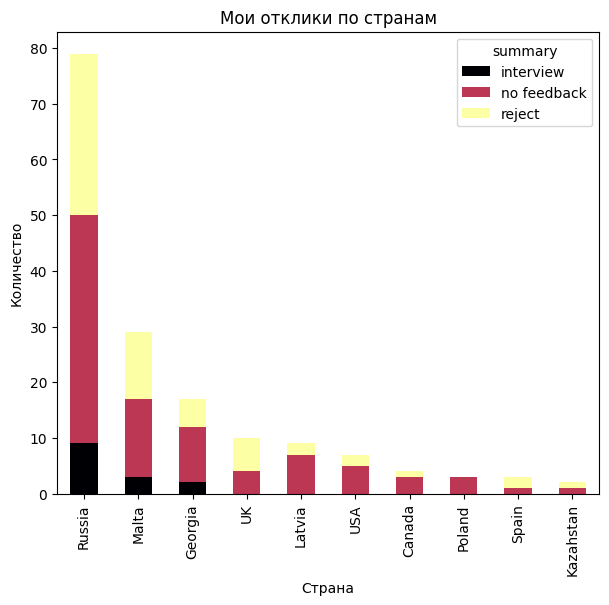

In [303]:
df_pivot_c.drop(columns='All').plot(kind='bar', stacked=True,cmap = 'inferno')
plt.title('Мои отклики по странам')
plt.xlabel('Страна')
plt.ylabel('Количество')
plt.savefig('1.jpeg')
#отклики и результаты по странам

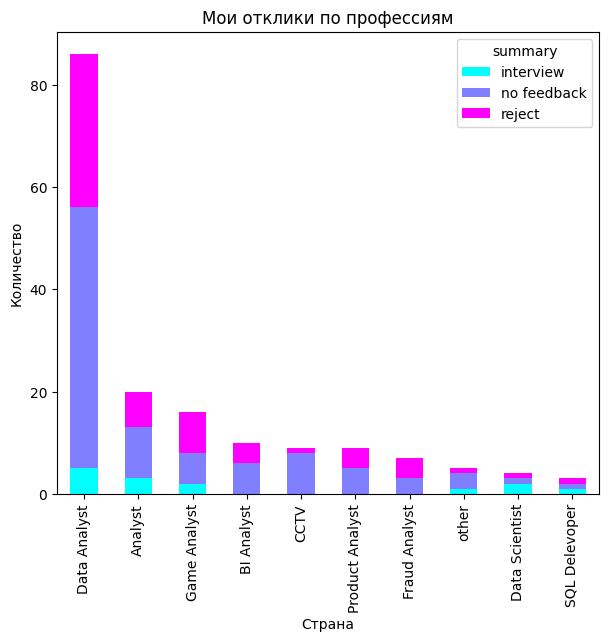

In [295]:
df_p.drop(columns = ['All','rej_rate','nofeed_rate','int_rate'], axis=1).plot(kind='bar', stacked=True,cmap = 'cool')
plt.title('Мои отклики по профессиям')
plt.xlabel('Страна')
plt.ylabel('Количество')
plt.savefig('1.jpeg')
#отклики и результаты по странам

In [284]:
df_pos = df_j.pivot_table(index = 'position', columns = 'summary',values='Date', aggfunc='count', fill_value = 0, margins = True).sort_values('All', ascending = False)

In [297]:
df_pivot_c = df_j.pivot_table(index = 'region', columns = 'summary',values='position', aggfunc='count', fill_value = 0, margins = True).sort_values('All', ascending = False)

In [299]:
df_pivot_c = df_pivot_c.drop(['All']).head(10)

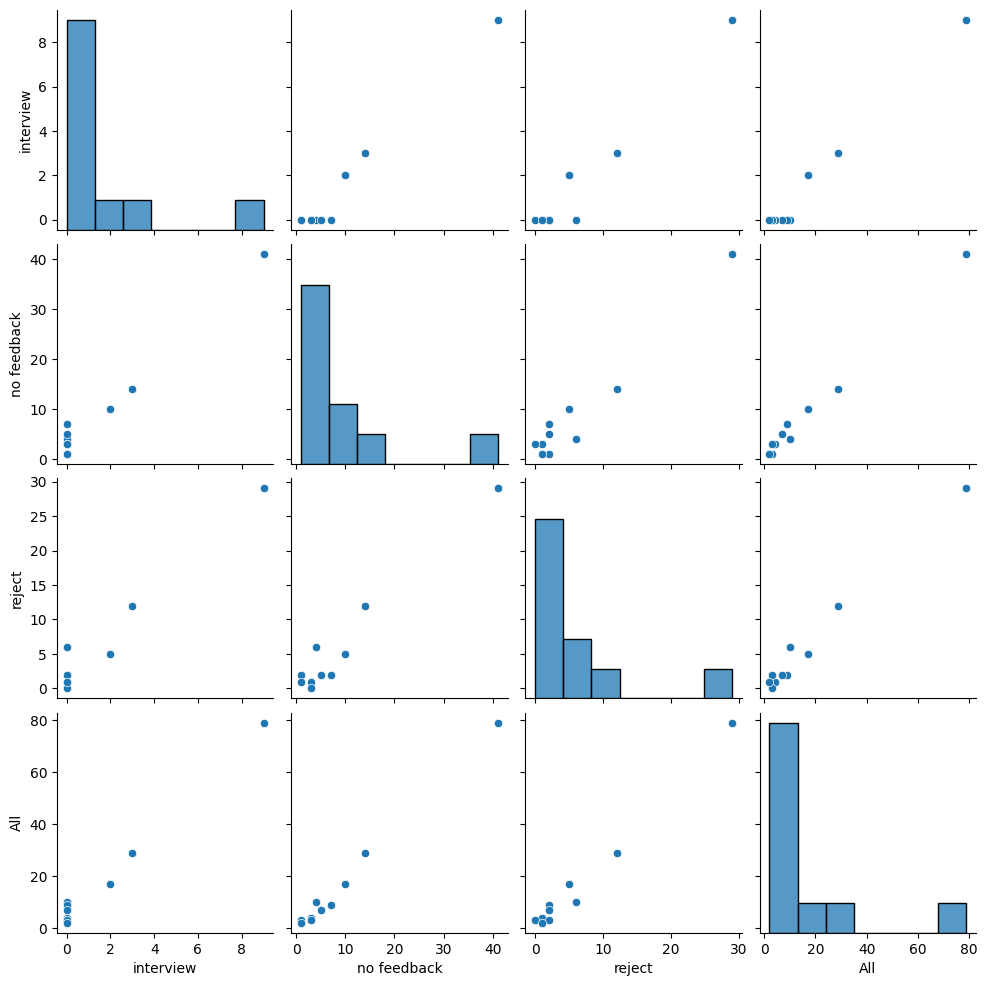

In [307]:
from matplotlib.pylab import savefig
sns.pairplot(df_pivot_c[['interview', 'no feedback', 'reject','All']])#у всех этих штук взаимная положительная корреляция
plt.savefig('corr.jpeg')
#что в целом понятно

In [285]:
df_p = df_pos.drop(['All']).head(10) #агрегации по топ-10 вакансий

In [286]:
df_p

summary,interview,no feedback,reject,All
position,,,,
Data Analyst,5,51,30,86
Analyst,3,10,7,20
Game Analyst,2,6,8,16
BI Analyst,0,6,4,10
CCTV,0,8,1,9
Product Analyst,0,5,4,9
Fraud Analyst,0,3,4,7
other,1,3,1,5
Data Scientist,2,1,1,4


In [288]:
df_p[['All','interview','no feedback']].sort_values('All', ascending = False).head(10).style.bar(align='mid', cmap = 'inferno')
#отклики по вакансиям

summary,All,interview,no feedback
position,,,
Data Analyst,86,5,51
Analyst,20,3,10
Game Analyst,16,2,6
BI Analyst,10,0,6
CCTV,9,0,8
Product Analyst,9,0,5
Fraud Analyst,7,0,3
other,5,1,3
Data Scientist,4,2,1


In [289]:
df_p['rej_rate']=round(df_p['reject']/df_p['All']*100,1)

In [290]:
df_p['nofeed_rate']=round(df_p['no feedback']/df_p['All']*100,1)

In [291]:
df_p['int_rate']=round(df_p['interview']/df_p['All']*100,1)

In [292]:
df_p[['rej_rate','All']].sort_values('rej_rate', ascending = False).head(3) #топ-3 профессии по отказам

summary,rej_rate,All
position,,
Fraud Analyst,57.1,7
Game Analyst,50.0,16
Product Analyst,44.4,9


In [ ]:
df_p[['nofeed_rate','All']].sort_values('nofeed_rate', ascending = False).head(3) #топ-3 профессии, на отклики на которые не приходит ответ

summary,nofeed_rate,All
position,,
CCTV,85.7,7
other,75.0,4
BI Analyst,60.0,10


In [ ]:
df_p[['int_rate','All']].sort_values('int_rate', ascending = False).head(5) #топ-5 профессии, на которые зовут на интервью

summary,int_rate,All
position,,
Data Scientist,50.0,4
SQL Delevoper,33.3,3
Analyst,20.0,20
Game Analyst,12.5,16
Data Analyst,6.0,84


In [293]:
df_p[['int_rate','rej_rate','nofeed_rate','All']].sort_values('All', ascending = False).head(5)

summary,int_rate,rej_rate,nofeed_rate,All
position,,,,
Data Analyst,5.8,34.9,59.3,86
Analyst,15.0,35.0,50.0,20
Game Analyst,12.5,50.0,37.5,16
BI Analyst,0.0,40.0,60.0,10
CCTV,0.0,11.1,88.9,9
